 # House princing predictions 
 ## Hichem MAIZA
 ## Part 1 : Linear Regression Vectorized Implimentation From Scratch

In [161]:
import numpy as np 
import pandas as pd 
import math 
import matplotlib.pyplot as plt 
import random 
import tensorflow as tf 
from tensorflow.python.framework import ops
%matplotlib inline 

# Train and Test data

In [162]:
def split_data(variables, train_size = 0.7):
    
    tmp = math.floor(len(variables)*train_size)
    
    data = {
        
        'trainX': (variables.as_matrix().T)[0:2,:tmp],
        'trainY': (train_variables.as_matrix().T)[2,:tmp].reshape(1,-1),
        'testX' : (variables.as_matrix().T)[0:2,tmp:],
        'testY' : (variables.as_matrix().T)[2,tmp:].reshape(1,-1)
        
    }
    
    return data

# Parameters initialization

In [163]:
def init_parameters(X):
    '''
    A function to initialize the model variables 
    
    Argumenrs :
    None 
    
    Output: 
    param -- initialized values 
    '''
    n_x = X.shape[0]
    W = np.random.randn(n_x, 1)
    b = np.zeros((1,1))
    
    param = {
        'W':W,
        'b':b
    }
    return param

# Forword Propagation

In [164]:
def forword_propagation(X, param):
    '''
    A function to compute the forword pass
    
    Arguments:
    X -- matrix of train data 
    param : parameters of the model 
    
    Outputs
    Z -- a vector of liner values
    '''
    W = param['W']
    b = param['b']
    Z = np.dot(W.T, X) + b
    
    return Z

# The backword Propagation

In [165]:
def backword_propagation(Z, Y):
    '''
    function that computes the cost and derivative
    
    Arguments: 
    Z -- Inputvector
    Y -- Labels Vector 
    
    Outputs:  
    grads -- a dictionnary of gradients values 
    '''
    m = Z.shape[1]
    dW = 2/m *np.dot(X,(Z-Y).T)
    db = 2/m *np.sum(Z-Y)
    
    grads = {
        'dW':dW,
        'db':db
    }
    
    return grads

# The Update parameters function

In [166]:
def update_parameters(grads,param, learning_rate = 0.001):
    
    '''
    A function for updating parameters 
    
    Arguments:
    grads -- A dictionnary of gradient parameters values 
    param -- A dictionnary of parameters 
    learning_rate -- the step of the gradient descent 
    
    Returns:
    param -- updated parameters
    '''    
    param['W'] = param['W'] - learning_rate*grads['dW']
    param['b'] = param['b'] - learning_rate*grads['db'] 
    
    return param

# The Global model Function

In [167]:
def model(X,Y,num_epoch = 500, learning_rate = 0.001):
    '''
    Linear regression Model : 
    
    Arguments
    X -- matrix of features
    Y -- vector of labels 
    num_epoch -- the number of times the gradient descent will execute 
    learning_rate -- the step of the gradient descent 
            
    Outputs: 
    param  -- The Updated parameters
    '''
    param  = init_parameters(X)
    
    for i in range(num_epoch):
        
        Z = forword_propagation(X, param)
        grads = backword_propagation(Z, Y)
        param = update_parameters(grads,param, learning_rate)
    
    return param 

# Run the Model 

In [168]:
houses_train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 
correlatedVlues = houses_train.corr()
selectedValues = (correlatedVlues['SalePrice'].sort_values(ascending=False)).head(3) 
MostCorrelated = [selectedValues.index[1],selectedValues.index[2]]
train_variables = houses_train[[MostCorrelated[0],MostCorrelated[1],'SalePrice']].astype(float)
data = split_data(train_variables, train_size = 0.7)

X = data['trainX']
Y = data['trainY'] 

X_test = data['testX']
Y_test = data['testY']

x = X/np.max(X)
y = Y/np.max(Y) 

x_test = X_test/np.max(X_test)
y_test = Y_test/np.max(Y_test)

In [169]:
param = model(x,y,num_epoch = 500, learning_rate = 0.001)
print(param)

{'b': array([[ 0.0008778]]), 'W': array([[ 1.9982101 ],
       [ 0.73315763]])}


# Part 2 : Linear Regression Using tensorflow

# Define Place Holders 

In [170]:
def tf_create_placeholders():
    
    '''
    A function to define place holders 
    
    Arguments : 
    --None--
    
    Outputs : 
    X : a palce holder for the training examples 
    Y : a place holder for the labels 
    '''

    X = tf.placeholder(dtype= 'float', shape=[2,None], name='X')
    Y = tf.placeholder(dtype= 'float', shape=[1,None], name='Y')
    
    return X,Y

# Initialize Variables 

In [171]:
def tf_initialze_variable(name='Variables') : 
    
    '''
    A function to initiaize the model parameters
    
    Argument :
    --Name-- For tensorboard purpose 
    
    Outputs : 
    params -- A dictionnary of parameters 
    '''
    
    with tf.name_scope(name) : # for tensor board purpose
        
        tf.set_random_seed(1) 
        W = tf.get_variable('W', [1,2], initializer = tf.contrib.layers.xavier_initializer(seed = 1)) 
        b = tf.get_variable('b', [1,1], initializer = tf.zeros_initializer())


        params = {
            'W':W,
            'b':b
        }
    return params

# Forword Pass 

In [172]:
def tf_forword_propagation(X,params) :
    
    '''
    Argument 
    X --  A place holder for training example 
    params -- a dictionnary of variables
    OUtput 
    Z -- function output value
    '''
    W = params['W']
    b = params['b']
    
    Z  = tf.add(tf.matmul(W,X), b) 
    
    return Z 
    

# Define the cost function 

In [173]:
def tf_compute_cost(Z,Y,name = 'cost'):
    
    with tf.name_scope(name):
        cost = tf.reduce_mean((Z-Y)**2)
    
    return cost

# Define mini batches 

In [174]:
def random_batches(X, Y, mini_batch_size = 64, seed = 0) :
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data
    Y -- true "label" vector
    mini_batch_size -- size of the mini-batches
    
    Returns:
    mini_batches -- list of (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # to get the same result every time so i can verify my results       
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.d
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k*mini_batch_size:k*mini_batch_size + mini_batch_size ]
        mini_batch_Y = shuffled_Y[:,k*mini_batch_size:k*mini_batch_size + mini_batch_size ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches*mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

# Define Global Model 

In [175]:
def tf_model (x,y, learning_rate = 0.001, epoch = 3000, mini_batch_size = 64) :  
    seed = 3
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    # create place holders 
    X, Y = tf_create_placeholders() 
    # initialize parameters 
    params = tf_initialze_variable()
    # Prform a forword pass
    Z = tf_forword_propagation(X,params)
    # define cost function 
    cost = tf_compute_cost(Z,Y,'cost') 
    # define train optimizer
    
    with tf.name_scope('train'):
        train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) 
        
    #initialize all variables 
    init = tf.global_variables_initializer() 
    costs = []
    
    with tf.Session() as sess: 
        sess.run(init)
        minibatches = random_batches(x, y, mini_batch_size, seed)
        for i in range(epoch):
            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                _,c= sess.run([train,cost],feed_dict={X:minibatch_X , Y:minibatch_Y})    
            
            if i % 100 == 0:
                print ("Cost after epoch %i: %f" % (i, c))
            if i % 5 == 0:
                costs.append(c)
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        writer = tf.summary.FileWriter('./train') 
        writer.add_graph(sess.graph)
        # lets save the parameters in a variable        
        
        params = sess.run(params)
        print ("Parameters have been trained!")
               
        
    return params

Cost after epoch 0: 0.494372
Cost after epoch 100: 0.040136
Cost after epoch 200: 0.035965
Cost after epoch 300: 0.032326
Cost after epoch 400: 0.029130
Cost after epoch 500: 0.026324
Cost after epoch 600: 0.023857
Cost after epoch 700: 0.021689
Cost after epoch 800: 0.019781
Cost after epoch 900: 0.018101


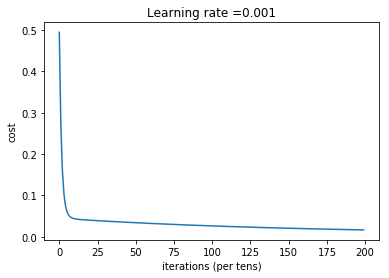

Parameters have been trained!
{'b': array([[ 0.31918105]], dtype=float32), 'W': array([[-1.25426805, -0.22813606]], dtype=float32)}


In [176]:
params = tf_model (x,y, learning_rate = 0.001, epoch = 1000, mini_batch_size = 32) 
print(params)